# 모델에 대한 설명1_PFI
* Permutation Feature Importance


## 1.환경준비

### 1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import * 

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.backend import clear_session

### 2) 데이터 로딩

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/boston.csv')
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


* 변수 설명
    * crim : 범죄율
    * zn : 대저택 비율
    * indus : 산업단지 비율
    * chas : 찰스 강변 여부
    * nox : 일산화질소 농도(공기오염도)
    * rm : 평균 주택당 방 수
    * age : 30년 이상된 주택 비율
    * dis : 주요 업무 지역 접근성 지수
    * rad : 고속도로 접근성 지수
    * tax  1만 달러당 재산세
    * ptratio : 교사 1명당 학생수
    * lstat : 하위계층 비율
    * black : 흑인비율(원래 숫자를 변형한 것임)
    * mdev : 타운별 집값 중위수(단위 : 1000달러)

### 3) 필요한 함수 생성

In [3]:
# 변수 중요도 plot
def plot_feature_importance(importance, names, topn = 'all'):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_temp = pd.DataFrame(data)

    fi_temp.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_temp.reset_index(drop=True, inplace = True)

    if topn == 'all' :
        fi_df = fi_temp.copy()
    else :
        fi_df = fi_temp.iloc[:topn]

    plt.figure(figsize=(10,8))
    sns.barplot(x='feature_importance', y='feature_names', data = fi_df)

    plt.xlabel('importance')
    plt.ylabel('feature names')
    plt.grid()

    return fi_df

## 2.데이터 준비


### 1) x, y로 나누기 

In [4]:
target = 'medv'
x = data.drop(target, axis = 1)
y = data.loc[:,target]

### 2) 가변수화

### 3) train : validation 분할

In [5]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = .2, random_state = 2022)
x_train.shape

(404, 13)

### 4) 스케일링

In [6]:
scaler = MinMaxScaler()
x_train_s = scaler.fit_transform(x_train)
x_val_s = scaler.transform(x_val)

## 3.Permutation Feature Importance

* model1 : SVM
* model2 : DL 

In [7]:
from sklearn.inspection import permutation_importance

### 1) SVM 모델

In [8]:
model1 = SVR()
model1.fit(x_train_s, y_train)

SVR()

* permutation feature importance 구하기

In [9]:
pfi1 = permutation_importance(model1, x_val_s, y_val, n_repeats=10, scoring = 'r2', random_state=2022)

In [10]:
pfi1

{'importances_mean': array([0.00945374, 0.02086725, 0.03294957, 0.03386631, 0.02895424,
        0.14430705, 0.05740539, 0.01810863, 0.02795648, 0.06606279,
        0.07908538, 0.01881995, 0.24118307]),
 'importances_std': array([0.00267741, 0.00728268, 0.00678155, 0.01320997, 0.00993524,
        0.01427471, 0.01680534, 0.01403577, 0.01069404, 0.01817568,
        0.01402084, 0.01418209, 0.02658648]),
 'importances': array([[0.01202894, 0.0107116 , 0.00956138, 0.01383913, 0.00721868,
         0.00671367, 0.0131682 , 0.00643447, 0.00687128, 0.00799003],
        [0.01532828, 0.02365336, 0.031247  , 0.01905323, 0.03024437,
         0.01534974, 0.02420276, 0.0057787 , 0.01862319, 0.02519188],
        [0.01920832, 0.03288757, 0.03588737, 0.03716216, 0.03562646,
         0.03493756, 0.03327672, 0.02338953, 0.0322704 , 0.04484963],
        [0.04604279, 0.02896597, 0.02650305, 0.06144869, 0.03828285,
         0.02357206, 0.03553383, 0.00886427, 0.03593179, 0.03351783],
        [0.02155195, 0.027

* feature별 Score 분포

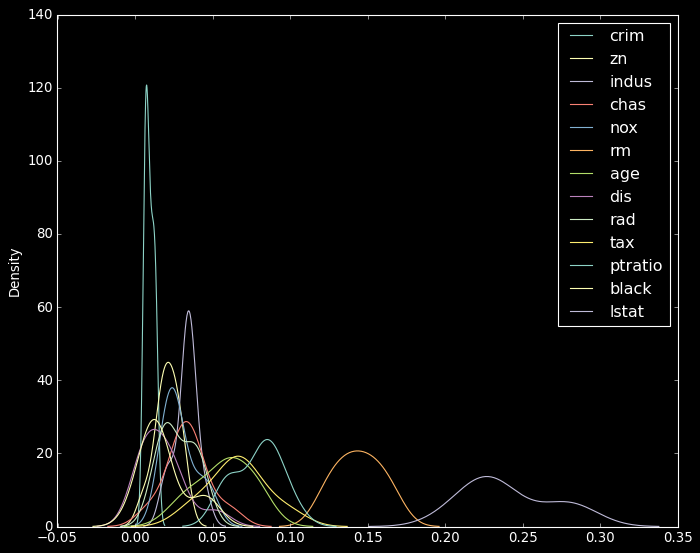

In [15]:
plt.style.use(['dark_background'])
plt.figure(figsize = (10,8))
for i,vars in enumerate(list(x)) :
    sns.kdeplot(pfi1.importances[i], label = vars)

plt.legend()
plt.show()

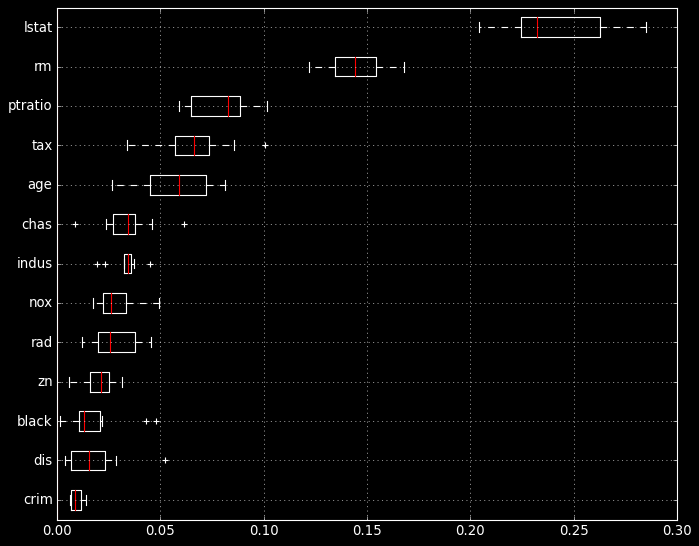

In [16]:
sorted_idx = pfi1.importances_mean.argsort()
plt.figure(figsize = (10, 8))
plt.boxplot(pfi1.importances[sorted_idx].T, vert=False, labels=x.columns[sorted_idx])
plt.axvline(0, color = 'r')
plt.grid()
plt.show()

* 평균값으로 변수중요도 그래프 그리기 

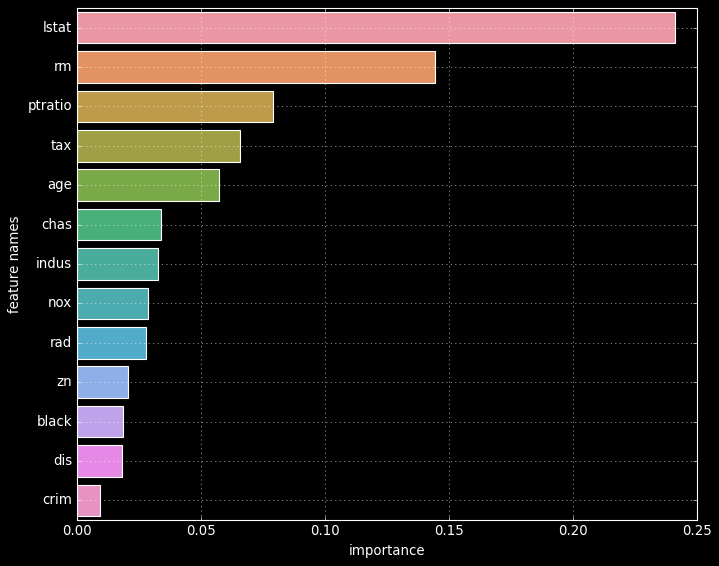

In [17]:
result = plot_feature_importance(pfi1.importances_mean, list(x_train))

### 2) DL 모델

* 간단한 DL 모델을 생성해 봅시다.

In [18]:
x_train_s.shape[1]

13

In [19]:
nfeatures = x_train_s.shape[1]
clear_session()

model2 = Sequential([Dense(32, input_shape = [nfeatures,], activation = 'relu'),
                     Dense(8, activation = 'relu'),
                     Dense(1)
                     ])

model2.compile(optimizer = 'adam', loss = 'mse')
history = model2.fit(x_train_s, y_train, epochs = 200, validation_split = .2).history

Epoch 1/200
11/11 [==============================] - 0s 9ms/step - loss: 632.5665 - val_loss: 592.5816
Epoch 2/200
11/11 [==============================] - 0s 2ms/step - loss: 617.5585 - val_loss: 580.6359
Epoch 3/200
11/11 [==============================] - 0s 2ms/step - loss: 606.3436 - val_loss: 571.3820
Epoch 4/200
11/11 [==============================] - 0s 4ms/step - loss: 597.4072 - val_loss: 563.0180
Epoch 5/200
11/11 [==============================] - 0s 2ms/step - loss: 588.5231 - val_loss: 553.1570
Epoch 6/200
11/11 [==============================] - 0s 2ms/step - loss: 577.5275 - val_loss: 540.7829
Epoch 7/200
11/11 [==============================] - 0s 2ms/step - loss: 563.5118 - val_loss: 525.1487
Epoch 8/200
11/11 [==============================] - 0s 2ms/step - loss: 546.5990 - val_loss: 506.7294
Epoch 9/200
11/11 [==============================] - 0s 2ms/step - loss: 526.5264 - val_loss: 485.1942
Epoch 10/200
11/11 [==============================] - 0s 2ms/step - loss:

* permutation feature importance 구하기
    * deep learning 모델에 대해서는 명시적으로 scoring = 'r2'을 지정해 줘야 합니다.

In [20]:
pfi2 = permutation_importance(model2, x_val_s, y_val, n_repeats=10, scoring = 'r2', random_state=2022)

In [21]:
pfi2

{'importances_mean': array([0.02902828, 0.01618357, 0.01151953, 0.00882522, 0.02271248,
        0.20013056, 0.00386116, 0.02952838, 0.08211316, 0.0670694 ,
        0.05490154, 0.05747942, 0.52799006]),
 'importances_std': array([0.01117577, 0.01081695, 0.00444008, 0.00749513, 0.00586642,
        0.03548657, 0.00963001, 0.02078138, 0.03012575, 0.01680402,
        0.01349282, 0.01534794, 0.06861408]),
 'importances': array([[ 0.03260333,  0.03419596,  0.03895605,  0.03839521,  0.01048868,
          0.0302938 ,  0.04678447,  0.01782021,  0.02697279,  0.0137723 ],
        [ 0.010587  ,  0.01438112,  0.00730322,  0.03277571,  0.02549867,
          0.01585226,  0.02874386, -0.00393191,  0.00723377,  0.02339197],
        [ 0.00748363,  0.01434283,  0.01112924,  0.00456668,  0.00922963,
          0.01803587,  0.01905244,  0.00713383,  0.01206045,  0.0121607 ],
        [ 0.01240703,  0.01240277, -0.00708027,  0.0213528 ,  0.01205271,
          0.01032024,  0.0029063 ,  0.00166317,  0.00821878, 

* feature별 Score 분포

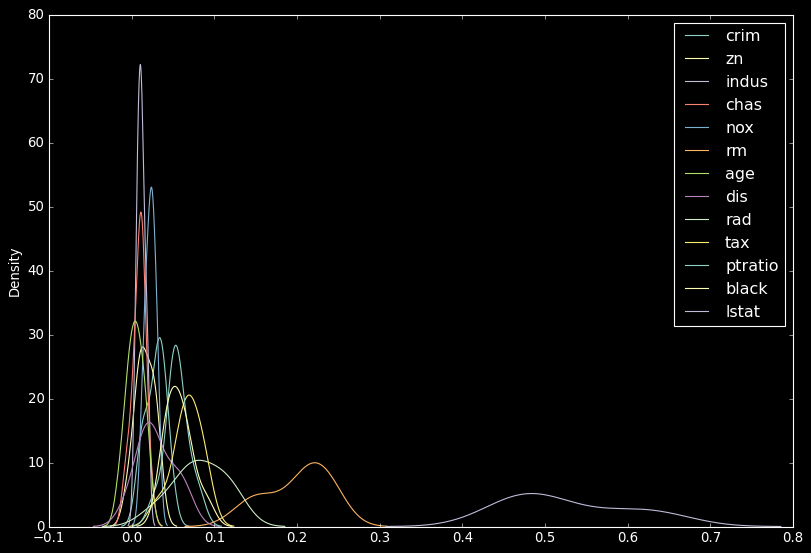

In [22]:
plt.figure(figsize = (12,8))
for i,vars in enumerate(list(x)) :
    sns.kdeplot(pfi2.importances[i], label = vars)

plt.legend()
plt.show()

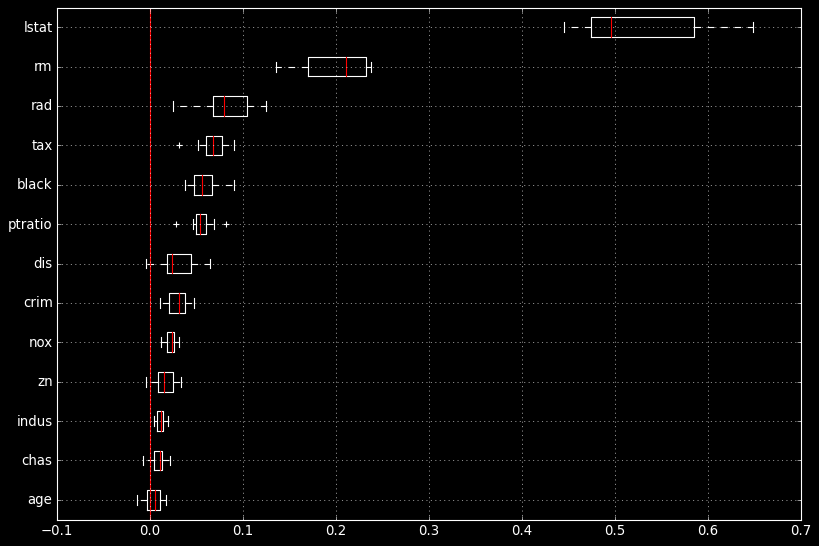

In [23]:
sorted_idx = pfi2.importances_mean.argsort()
plt.figure(figsize = (12,8))
plt.boxplot(pfi2.importances[sorted_idx].T, vert=False, labels=x.columns[sorted_idx])
plt.axvline(0, color = 'r')
plt.grid()
plt.show()

* 평균값으로 변수중요도 그래프 그리기 

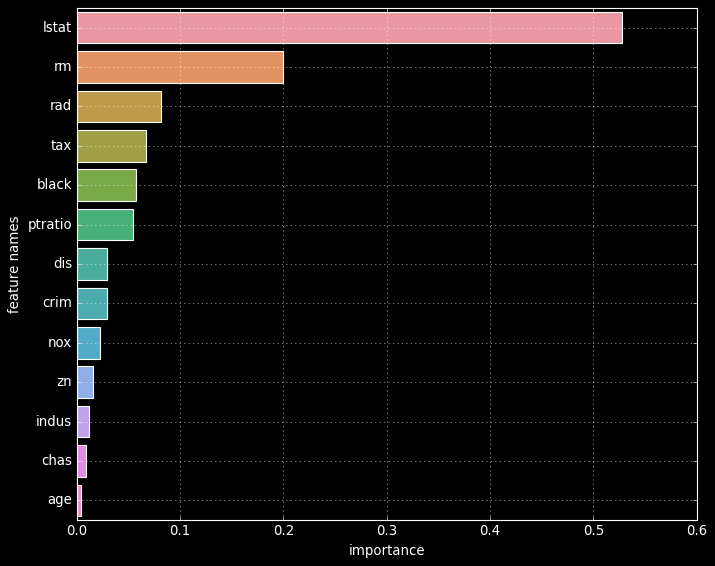

In [24]:
result = plot_feature_importance(pfi2.importances_mean, list(x_train))

In [25]:
from sklearn.metrics import *

In [26]:
pred1 = model1.predict(x_val_s)
print(mean_absolute_error(y_val, pred1))

3.246841982884418


In [27]:
pred2 = model2.predict(x_val_s)
print(mean_absolute_error(y_val, pred2))

3.919317752707238


## 4.실습 : 직원 이직 예측모델 변수 중요도 비교

### 1) 데이터 준비

* 데이터 로딩

In [28]:
# data data
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/Attrition2.csv"
data = pd.read_csv(path)
data.head(10)

,Attrition,Age,Department,DistanceFromHome,Education,EducationField,Gender,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany
0,0,28,Research & Development,1,3,Medical,Female,Research Scientist,1,Married,3591,1,3,3,3,3,3
1,1,37,Research & Development,2,2,Other,Male,Laboratory Technician,3,Single,2090,6,2,7,3,3,0
2,0,27,Research & Development,8,5,Life Sciences,Male,Laboratory Technician,3,Married,4621,1,4,3,4,3,3
3,0,18,Research & Development,1,3,Life Sciences,Female,Laboratory Technician,4,Single,1611,1,3,0,5,4,0
4,0,29,Research & Development,9,3,Life Sciences,Male,Research Scientist,3,Married,2451,6,1,5,2,2,1
5,0,44,Research & Development,2,1,Medical,Male,Manufacturing Director,3,Single,10209,5,2,16,2,2,2
6,0,41,Sales,10,2,Life Sciences,Male,Sales Executive,4,Single,6230,7,4,16,3,3,14
7,0,25,Sales,18,1,Life Sciences,Male,Sales Executive,3,Married,6232,2,2,6,3,2,3
8,0,50,Research & Development,2,3,Medical,Male,Research Director,3,Married,17639,5,4,30,3,3,4
9,0,47,Sales,4,2,Life Sciences,Female,Sales Executive,4,Single,4163,1,3,9,0,3,9


|	변수 명	|	내용	|	구분	|
|	----	|	----	|	----	|
|	**Attrition**	|	이직여부, Yes = 1 , No = 0	|	**Target**	|
|	Age	|	나이	|	숫자	|
|	BusinessTravel	|	출장 빈도(범주)	|		|
|	Department	|	현 부서	|		|
|	DistanceFromHome	|	집-직장 거리(마일)	|	숫자	|
|	Education	|	교육수준(범주)	|	1 Below College, 2 College, 3 Bachelor, 4 Master, 5 Doctor	|
|	EducationField	|	전공	|		|
|	EnvironmentSatisfaction	|	근무환경에 대한 만족도(범주)	|	1 Low, 2 Good, 3 Excellent, 4 Outstanding	|
|	Gender	|	성별	|		|
|	JobInvolvement	|	직무 적극성(참여도)	|	1 Low, 2 Medium, 3 High, 4 Very High	|
|	JobRole	|	직무	|		|
|	JobSatisfaction	|	직무 만족도	|	1 Low, 2 Medium, 3 High, 4 Very High	|
|	MaritalStatus	|	결혼상태	|		|
|	MonthlyIncome	|	월급	|	숫자	|
|	NumCompaniesWorked	|	현재까지 근무한 회사 수	|	숫자	|
|	PercentSalaryHike	|	전년대비 급여인상율(%)	|	숫자	|
|	RelationshipSatisfaction	|	동료와의 관계 만족도	|	1 Low, 2 Medium, 3 High, 4 Very High	|
|	StockOptionLevel	|	스톡옵션 수준 0~3	|	범주	|
|	TotalWorkingYears	|	총 근무 연수	|	숫자	|
|	TrainingTimesLastYear	|	전년 교육훈련 횟수	|	숫자	|
|	WorkLifeBalance	|	워라밸. 일-삶 균형도	|	1 Bad, 2 Good, 3 Better, 4 Best	|
|	YearsAtCompany	|	현직장 근무 연수	|	숫자	|
|	YearsInCurrentRole	|	현직무 연수	|	숫자	|
|	YearsWithCurrManager	|	현 팀장과 근무한 연수	|	숫자	|


In [29]:
target = 'Attrition'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

In [30]:
y.value_counts() / y.shape[0]

0    0.913043
1    0.086957
Name: Attrition, dtype: float64

* 가변수화 Dummy Variable

In [31]:
dummy_vars = ['Education','Department','EducationField','Gender','JobRole','JobSatisfaction','MaritalStatus',
              'RelationshipSatisfaction','WorkLifeBalance'] # 가변수화 대상 변수 이름 리스트 만든다
x = pd.get_dummies(x, columns = dummy_vars, drop_first=True) 

* 데이터 분할
    * 이미 test set은 분할되어 있다고 가정합니다.
    * 주어진 데이터를 train set : validation set 으로 분할

In [32]:
# train_val에서 train : val = 8 : 2
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state = 2022)

In [33]:
print(x_train.shape, x_val.shape)

(920, 38) (230, 38)


* class balance를 맞추기 위한 resampling

In [34]:
from imblearn.over_sampling import SMOTE

In [35]:
smote = SMOTE()
sm_x_train, sm_y_train = smote.fit_resample(x_train, y_train)

* 스케일링

In [36]:
scaler = MinMaxScaler()
sm_x_train_s = scaler.fit_transform(sm_x_train)
x_val_s = scaler.transform(x_val)

### 2) 모델링 및 변수 중요도 계산하기

* model1 : SVM
* model2 : KNN

In [37]:
from sklearn.inspection import permutation_importance

#### ① SVM 모델

* 모델링

In [80]:
model_svm = SVC().fit(sm_x_train_s,sm_y_train)

* permutation feature importance 구하기

In [81]:
temp = permutation_importance(model_svm, sm_x_train_s, sm_y_train, n_repeats=10, scoring='r2')

In [82]:
temp.importances_mean

array([ 0.00072029,  0.00504202,  0.0057623 ,  0.00432173,  0.00216086,
        0.0057623 ,  0.00072029,  0.0057623 ,  0.0060024 ,  0.00744298,
        0.00072029,  0.00072029,  0.0062425 ,  0.05498199,  0.00432173,
        0.05330132, -0.00096038, -0.00360144,  0.00696279,  0.00936375,
        0.00720288,  0.00504202,  0.00048019,  0.        ,  0.00480192,
        0.00168067,  0.00696279,  0.00912365,  0.00432173,  0.01008403,
        0.0244898 ,  0.00984394,  0.0062425 ,  0.02040816,  0.00960384,
        0.02521008,  0.03457383,  0.00504202])

* feature별 Score 분포

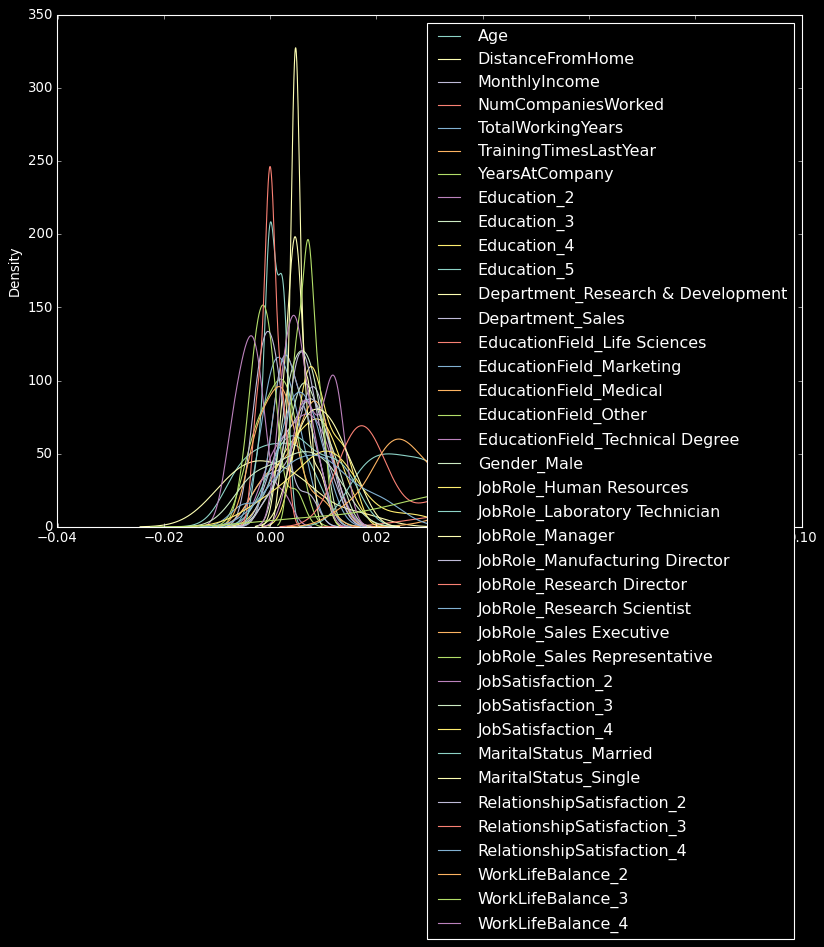

In [83]:
plt.figure(figsize = (12,8))
for i, vars in enumerate(list(x)) :
    sns.kdeplot(temp.importances[i], label = vars)

plt.legend()
plt.show()

* 평균값으로 변수중요도 그래프 그리기 

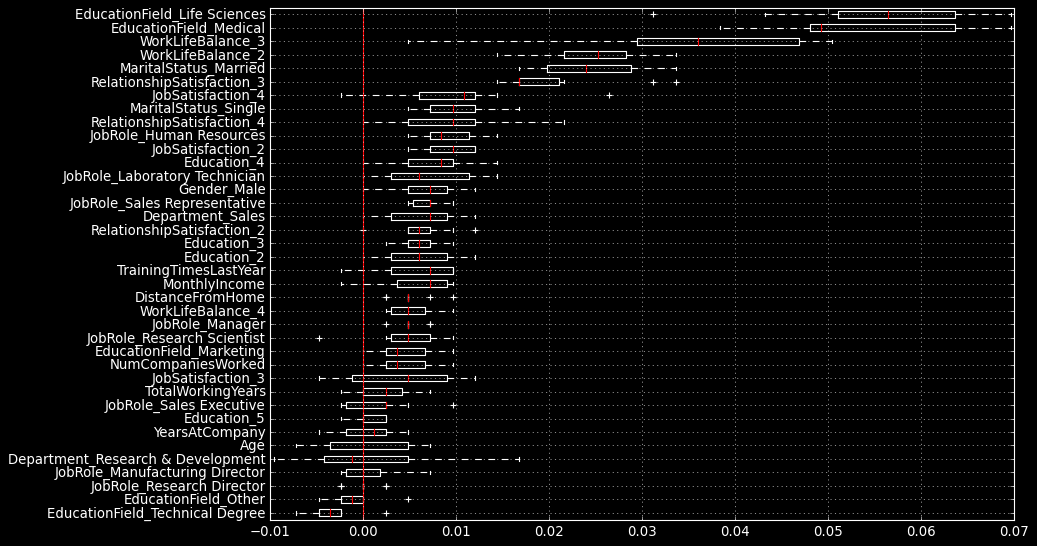

In [84]:
sorted_svm = temp.importances_mean.argsort()
plt.figure(figsize = (12,8))
plt.boxplot(temp.importances[sorted_svm].T, vert=False, labels=x.columns[sorted_svm])
plt.axvline(0, color = 'r')
plt.grid()
plt.show()

* 예측 및 평가

#### ② KNN 모델

* 모델링

In [85]:
model_knn = KNeighborsClassifier().fit(sm_x_train_s, sm_y_train)

* permutation feature importance 구하기

In [86]:
pfi_knn = permutation_importance(model_knn, sm_x_train_s, sm_y_train, n_repeats=10)

* feature별 Score 분포

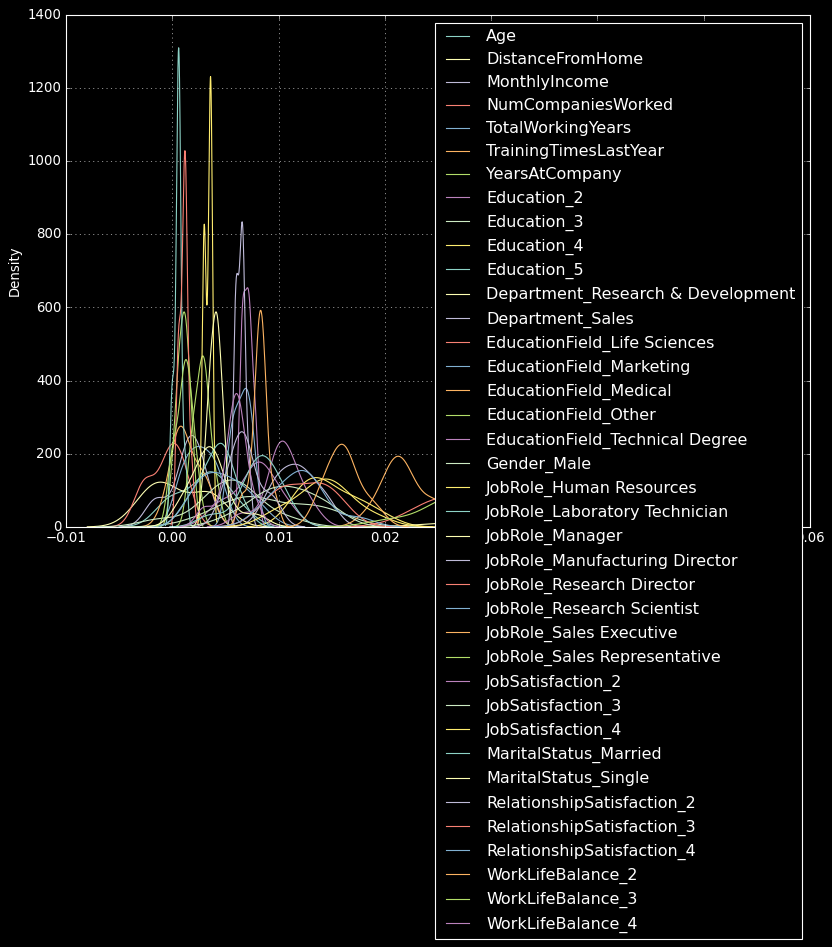

In [89]:
plt.figure(figsize=(12,8))
for i, var in enumerate(list(x)):
    sns.kdeplot(x=pfi_knn.importances[i], label=var)
plt.grid()
plt.legend()
plt.show()

* 평균값으로 변수중요도 그래프 그리기 

In [90]:
sorted_knn_idx = pfi_knn.importances_mean.argsort()

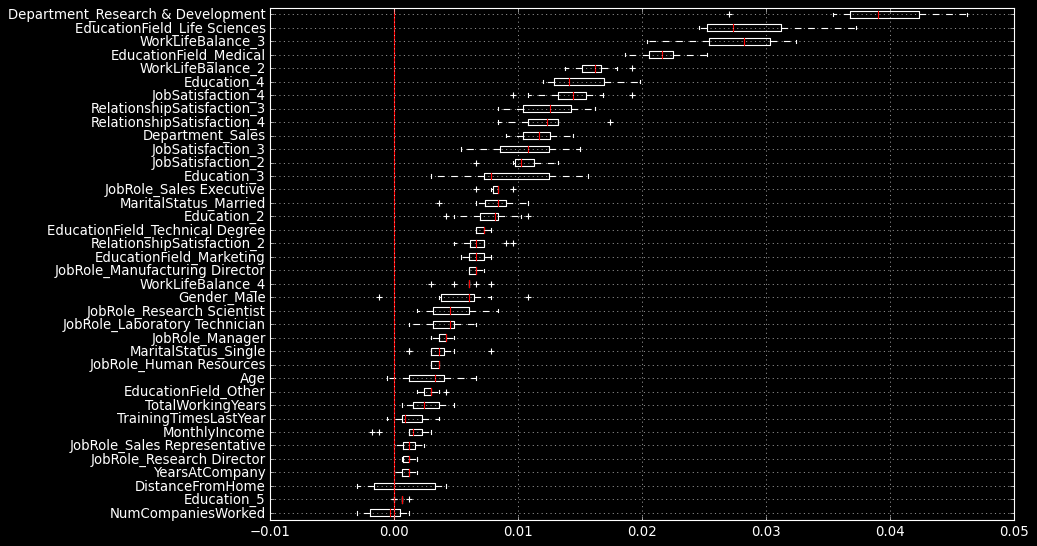

In [101]:
plt.figure(figsize = (12,8))
plt.boxplot(pfi_knn.importances[sorted_knn_idx].T, vert=False, labels=x.columns[sorted_knn_idx])
plt.axvline(0, color = 'r')
plt.grid()
plt.show()

In [105]:
pfi_knn.importances

array([[ 0.        ,  0.00540216,  0.00360144,  0.00060024,  0.00360144,
         0.00660264,  0.0030012 ,  0.0030012 ,  0.00420168, -0.00060024],
       [-0.00180072,  0.        , -0.0030012 ,  0.00240096,  0.00420168,
         0.00360144, -0.00120048,  0.00360144,  0.        , -0.00180072],
       [ 0.00240096,  0.00180072, -0.00120048,  0.0030012 ,  0.00120048,
         0.0030012 ,  0.00120048,  0.00180072,  0.00120048, -0.00180072],
       [ 0.00120048,  0.00060024,  0.        ,  0.        , -0.00240096,
        -0.00060024, -0.00240096,  0.00120048, -0.0030012 , -0.00060024],
       [ 0.00240096,  0.00120048,  0.00360144,  0.00240096,  0.00120048,
         0.00360144,  0.00060024,  0.00420168,  0.00480192,  0.00240096],
       [ 0.00360144,  0.00240096,  0.00180072,  0.00060024,  0.00060024,
        -0.00060024,  0.00060024,  0.00060024,  0.00120048,  0.0030012 ],
       [ 0.        ,  0.00180072,  0.00120048,  0.00120048,  0.00060024,
         0.00180072,  0.00060024,  0.00060024